In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import time
import collections
import tensorflow as tf

from collections import Counter
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, StratifiedShuffleSplit, learning_curve, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, cross_val_predict

from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Data Visualization

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
non_fraud_percent = df['Class'].value_counts()[0]/len(df) * 100
fraud_percent = df['Class'].value_counts()[1]/len(df) * 100
print("Non-fraud activities: {:.2f}%\nFraud activities:     {:.2f}%".format(non_fraud_percent, fraud_percent))


Non-fraud activities: 99.83%
Fraud activities:     0.17%


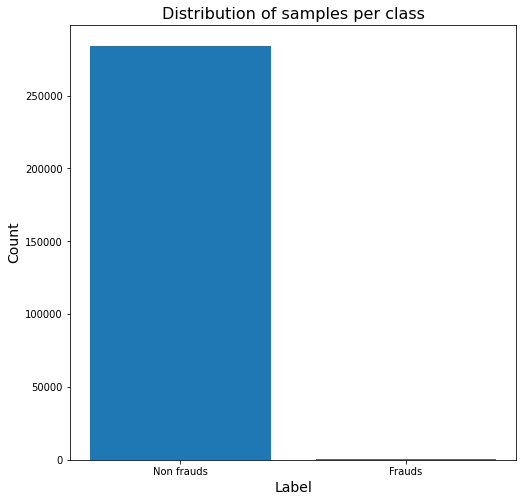

In [6]:
non_fraud_count = df['Class'].value_counts()[0]
fraud_count = df['Class'].value_counts()[1]

plt.figure(figsize=(8, 8))
plt.bar(['Non frauds', 'Frauds'], [non_fraud_count, fraud_count])
plt.ylabel("Count", fontsize=14)
plt.xlabel("Label", fontsize=14)
plt.title("Distribution of samples per class", fontsize=16)
plt.show()

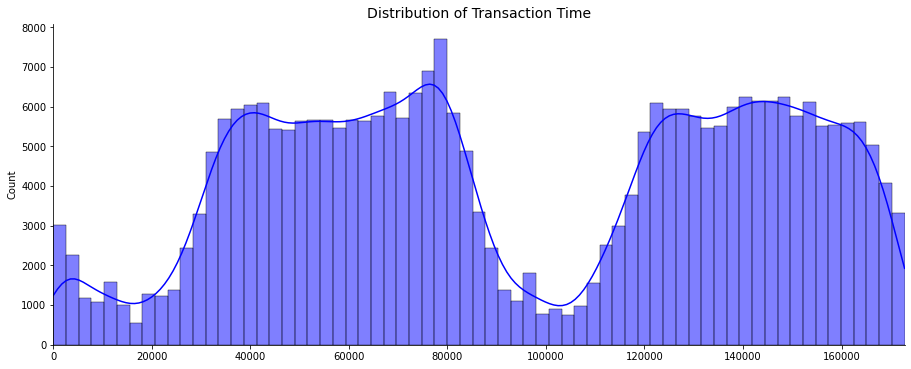

In [7]:
time_count = df['Time'].values

displt = sns.displot(time_count, color='b', kde=True)
displt.fig.set_figwidth(15)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_count), max(time_count)])
plt.show()


#### Scaling

In [8]:
std_scaler = StandardScaler()
robust_scaler = RobustScaler()  # this scaler is less sensitive to outliers

df['ScaledTime'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['ScaledAmount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledTime,ScaledAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [10]:
ScaledAmount = df['ScaledAmount']
ScaledTime = df['ScaledTime']
df.drop(['ScaledTime', 'ScaledAmount'], axis=1, inplace=True)

In [11]:
df.insert(0, "ScaledAmount", ScaledAmount)
df.insert(1, "ScaledTime", ScaledTime)
df.head()

,ScaledAmount,ScaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Splitting the data

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

StratKFold = StratifiedKFold(n_splits=8, random_state=None, shuffle=False)

for train_idxs, test_idxs in StratKFold.split(X, y):
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    y_train, y_test = y.iloc[train_idxs], y.iloc[test_idxs]

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)


training_set_distribs = train_counts/ len(y_train)
test_set_distribs = test_counts/ len(y_test)
print("Distribution of labels after StratifiedKFold:\nTraining set: {}\nTesting set:  {}".format(training_set_distribs, test_set_distribs))

Distribution of labels after StratifiedKFold:
Training set: [0.99827051 0.00172949]
Testing set:  [0.99828652 0.00171348]


#### Adding Random UnderSampling

In [13]:
df = df.sample(frac=1)

non_fraud_df = df.loc[df['Class'] == 0][:492]
fraud_df = df.loc[df['Class'] == 1]

normal_distrib_df = pd.concat([fraud_df, non_fraud_df])
shuffled_df = normal_distrib_df.sample(frac=1, random_state=42)
print("Length of undersampled DataFrame: {}".format(len(shuffled_df)))
shuffled_df.head()

Length of undersampled DataFrame: 984


,ScaledAmount,ScaledTime,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
256450,-0.294977,0.857705,2.065955,0.025835,-1.049368,0.402022,-0.044532,-1.180811,0.252007,-0.391390,...,-0.160707,-0.279224,-0.618520,0.326811,0.048732,-0.261533,0.193646,-0.063950,-0.058081,0
15736,1.089779,-0.675866,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,...,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,1
139252,-0.168378,-0.018962,-0.778491,0.683171,2.116507,-0.323596,-0.126900,-0.552431,0.636881,0.041499,...,-0.137840,-0.066934,-0.101802,-0.353743,0.429859,0.515556,0.434280,-0.012468,0.050777,0
42590,-0.233354,-0.511378,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,...,1.191078,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,1
243547,0.499266,0.790423,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,...,-0.953827,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,1


#### Further visualization

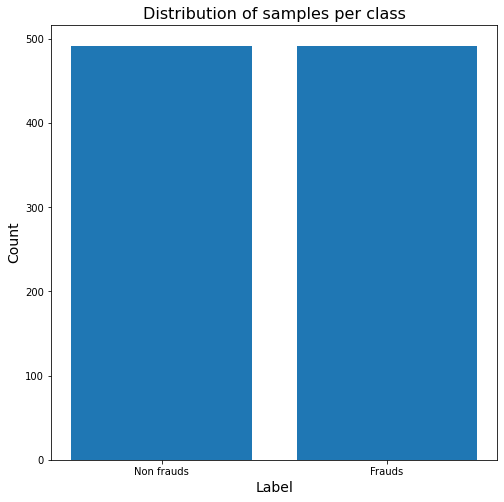

In [14]:
non_fraud_US = shuffled_df['Class'].value_counts()[0]
fraud_US = shuffled_df['Class'].value_counts()[1]

plt.figure(figsize=(8, 8))
plt.bar(['Non frauds', 'Frauds'], [non_fraud_US, fraud_US])
plt.ylabel("Count", fontsize=14)
plt.xlabel("Label", fontsize=14)
plt.title("Distribution of samples per class", fontsize=16)
plt.show()

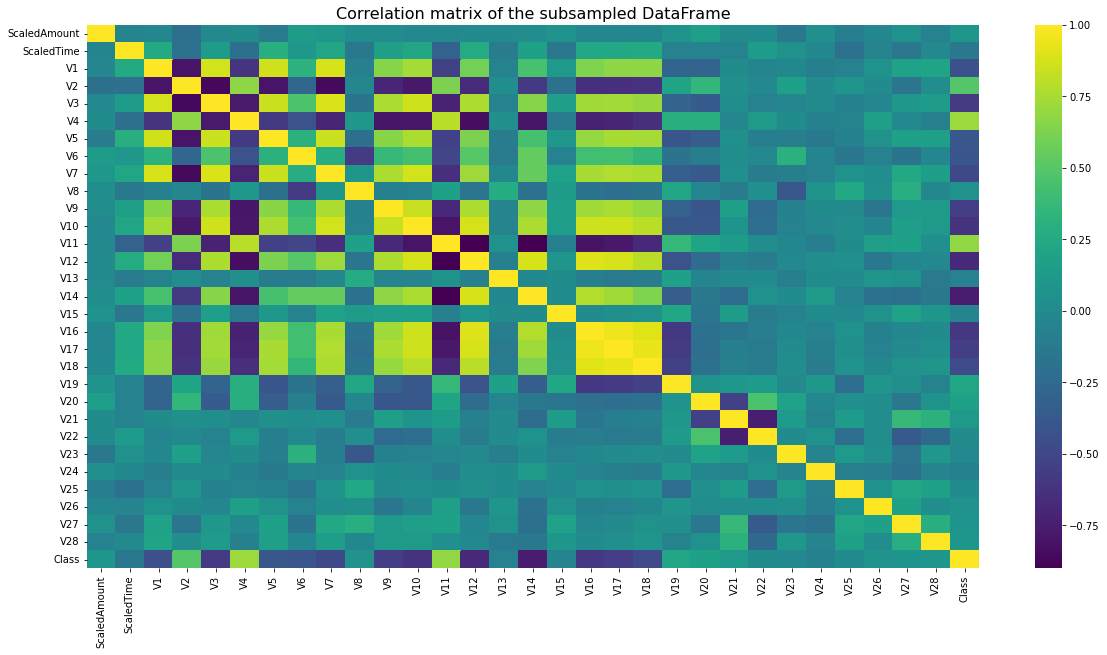

In [15]:
subsampled_corr = shuffled_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(subsampled_corr, cmap='viridis')
plt.title("Correlation matrix of the subsampled DataFrame", fontsize=16)
plt.show()

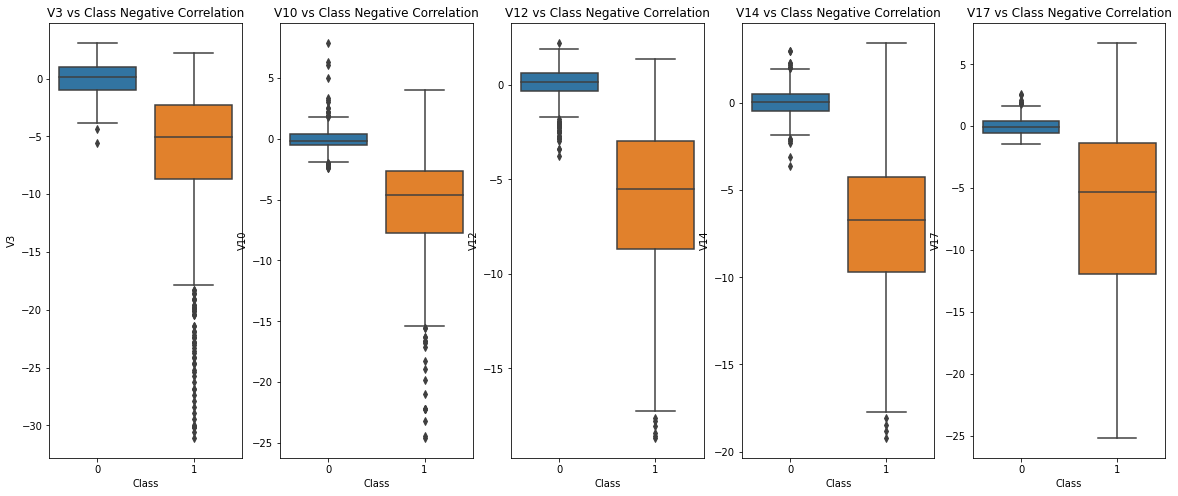

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(20, 8))

sns.boxplot(x="Class", y="V3", data=shuffled_df, ax=axes[0])
axes[0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=shuffled_df, ax=axes[1])
axes[1].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=shuffled_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=shuffled_df, ax=axes[3])
axes[3].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=shuffled_df, ax=axes[4])
axes[4].set_title('V17 vs Class Negative Correlation')
plt.show()

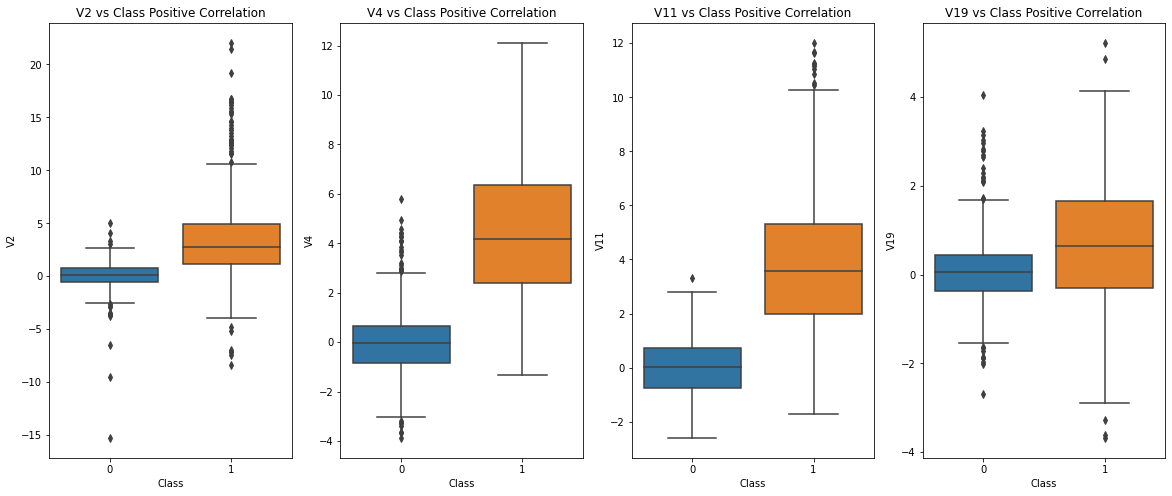

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

sns.boxplot(x="Class", y="V2", data=shuffled_df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=shuffled_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=shuffled_df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=shuffled_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

#### Removing Outliers

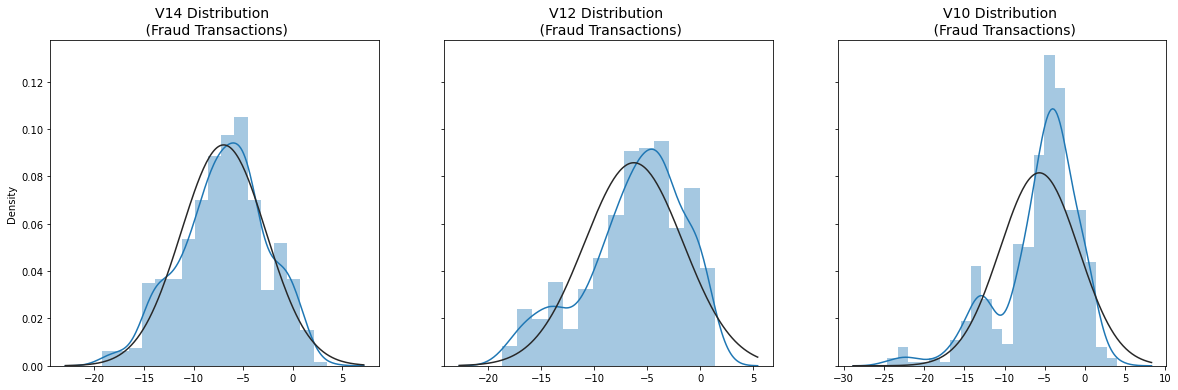

In [18]:
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)    # maybe test on the positive correlation too

v14_fraud_distrib = shuffled_df['V14'].loc[shuffled_df['Class'] == 1].values
sns.distplot(v14_fraud_distrib, ax=axes[0], fit=norm)
axes[0].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_distrib = shuffled_df['V12'].loc[shuffled_df['Class'] == 1].values
sns.distplot(v12_fraud_distrib, ax=axes[1], fit=norm)
axes[1].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_distrib = shuffled_df['V10'].loc[shuffled_df['Class'] == 1].values
sns.distplot(v10_fraud_distrib, ax=axes[2], fit=norm)
axes[2].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)
plt.show()

In [19]:
v10_fraud = shuffled_df['V10'].loc[shuffled_df['Class'] == 1].values
quartile25 = np.percentile(v10_fraud, 25)
quartile75 = np.percentile(v10_fraud, 75)
v10_IQR = quartile75 - quartile25

v10_thresh = 1.5 * v10_IQR

v10_lower_bound = quartile25 - v10_thresh
print("Lower bound for V10: {}".format(v10_lower_bound))
v10_upper_bound = quartile75 + v10_thresh
print("Upper bound for V10: {}\n".format(v10_upper_bound))

outliers = [x for x in v10_fraud if x < v10_lower_bound or x > v10_upper_bound]
print("There are {} outliers\nValues of outliers:\n {}".format(len(outliers), outliers))

outlier_idxs = (shuffled_df['V10'] > v10_upper_bound) | (shuffled_df['V10'] < v10_lower_bound)
shuffled_df = shuffled_df.drop(shuffled_df[outlier_idxs].index)


Lower bound for V10: -15.47046969983434
Upper bound for V10: 5.099587558797303

There are 19 outliers
Values of outliers:
 [-17.1415136412892, -22.1870885620007, -22.1870885620007, -16.2556117491401, -24.4031849699728, -16.7460441053944, -22.1870885620007, -18.9132433348732, -22.1870885620007, -16.6496281595399, -16.6011969664137, -19.836148851696, -20.9491915543611, -24.5882624372475, -15.5637913387301, -15.5637913387301, -18.2711681738888, -16.3035376590131, -23.2282548357516]


In [20]:
v12_fraud = shuffled_df['V12'].loc[shuffled_df['Class'] == 1].values
quartile25 = np.percentile(v12_fraud, 25)
quartile75 = np.percentile(v12_fraud, 75)

v12_iqr = quartile75 - quartile25
v12_thresh = 1.5 * v12_iqr

v12_lower_bound = quartile25 - v12_thresh
print("Lower bound for V12: {}".format(v12_lower_bound))
v12_upper_bound = quartile75 + v12_thresh
print("Upper bound for V12: {}\n".format(v12_upper_bound))

outliers = [x for x in v12_fraud if x < v12_lower_bound or x > v12_upper_bound]
print("There are {} outliers\nValues of outliers:\n {}".format(len(outliers), outliers))

outliers_idxs = (shuffled_df['V12'] > v12_upper_bound) | (shuffled_df['V12'] < v12_lower_bound)
shuffled_df = shuffled_df.drop(shuffled_df[outliers_idxs].index)

Lower bound for V12: -16.922496886663865
Upper bound for V12: 5.633585132371216

There are 13 outliers
Values of outliers:
 [-18.5536970096458, -17.1313009454468, -17.7691434633638, -17.003289445516, -17.1829184301947, -18.4311310279993, -17.2286622386187, -17.6316063138707, -18.6837146333443, -17.1504052507291, -17.003289445516, -17.1829184301947, -18.0475965708216]


In [21]:
v14_fraud = shuffled_df['V14'].loc[shuffled_df['Class'] == 1].values
quartile25 = np.percentile(v14_fraud, 25)
quartile75 = np.percentile(v14_fraud, 75)

v14_iqr = quartile75 - quartile25
v14_thresh = 1.5 * v14_iqr

v14_lower_bound = quartile25 - v14_thresh
print("Lower bound for V14: {}".format(v14_lower_bound))
v14_upper_bound = quartile75 + v14_thresh
print("Upper bound for V14: {}\n".format(v14_upper_bound))

outliers = [x for x in v14_fraud if x < v14_lower_bound or x > v14_upper_bound]
print("There are {} outliers\nValues of outliers:\n {}".format(len(outliers), outliers))

outliers_idxs = (shuffled_df['V14'] < v14_lower_bound) | (shuffled_df['V14'] > v14_upper_bound)
shuffled_df = shuffled_df.drop(shuffled_df[outliers_idxs].index)

Lower bound for V14: -17.101993690511843
Upper bound for V14: 3.3988933645677344

There are 5 outliers
Values of outliers:
 [-17.6206343516773, -17.4759212828566, 3.44242199594215, -17.7216383537133, -17.230202160711]


Text(0.5, 1.0, 'V14 Feature after outliers dropping')

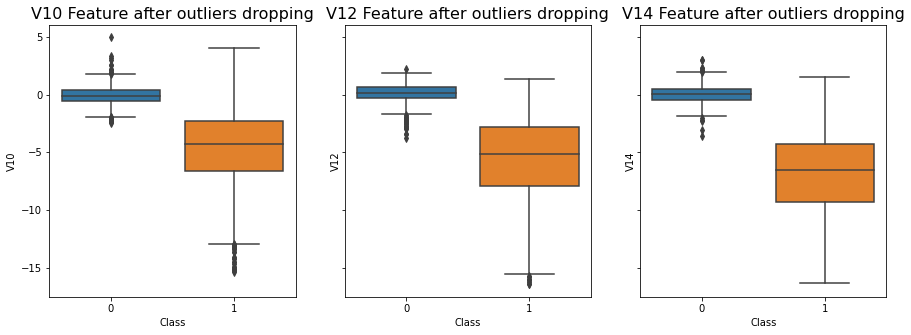

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.boxplot(x="Class", y="V10", data=shuffled_df, ax=axes[0])
axes[0].set_title("V10 Feature after outliers dropping", fontsize=16)

sns.boxplot(x="Class", y="V12", data=shuffled_df, ax=axes[1])
axes[1].set_title("V12 Feature after outliers dropping", fontsize=16)

sns.boxplot(x="Class", y="V14", data=shuffled_df, ax=axes[2])
axes[2].set_title("V14 Feature after outliers dropping", fontsize=16)

#### Dimensionality Reduction

In [23]:
X = shuffled_df.drop("Class", axis=1)
y = shuffled_df['Class']

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2f}s".format(t1- t0))

t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_pca  = pca.fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2f}s".format(t1 - t0))


t0 = time.time()
svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42)
X_svd = svd.fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2f}s".format(t1-t0))

T-SNE took 5.10s
PCA took 0.12s
Truncated SVD took 0.01s


Text(0.5, 1.0, 'Truncated SVD')

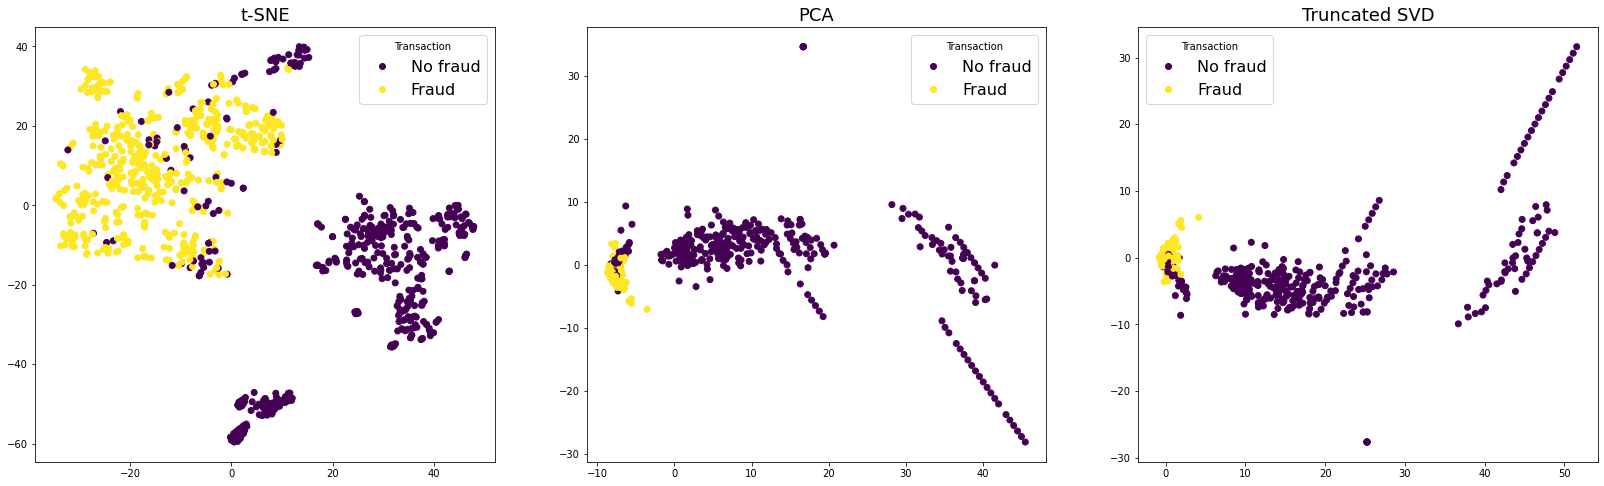

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(28, 8))

sctr = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=(y==0))
lines, labels = sctr.legend_elements()
labels = ['No fraud', 'Fraud']
legend = axes[0].legend(lines, labels,
                    loc="best", title="Transaction", fontsize=16)
axes[0].set_title("t-SNE", fontsize=18)

sctr = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=(y==0))
lines, labels = sctr.legend_elements()
labels = ['No fraud', 'Fraud']
legend = axes[1].legend(lines, labels,
                    loc="best", title="Transaction", fontsize=16)
axes[1].set_title("PCA", fontsize=18)

sctr = axes[2].scatter(X_svd[:, 0], X_svd[:, 1], c=(y==0))
lines, labels = sctr.legend_elements()
labels = ['No fraud', 'Fraud']
legend = axes[2].legend(lines, labels,
                    loc="best", title="Transaction", fontsize=16)
axes[2].set_title("Truncated SVD", fontsize=18)

#### Testing various classifiers

In [25]:
# The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
# If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)

X = shuffled_df.drop("Class", axis=1)
y = shuffled_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    trainig_score = cross_val_score(classifier, X_train, y_train, cv=8)
    print("{} has an average training score of: {:.2f}%".format(classifier.__class__.__name__, trainig_score.mean()*100))

LogisticRegression has an average training score of: 94.06%
KNeighborsClassifier has an average training score of: 92.51%
SVC has an average training score of: 92.93%
DecisionTreeClassifier has an average training score of: 90.67%


In [26]:
param_grid_log_reg = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg)
grid_log_reg.fit(X_train, y_train)
print("Best parameters for Logistic Regression: {}".format(grid_log_reg.best_params_))
best_log_reg = grid_log_reg.best_estimator_


param_grid_knn = {'n_neighbors': list(range(2, 10, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNNClassifier: {}".format(grid_knn.best_params_))
best_knn = grid_knn.best_estimator_


param_grid_svc = {'C': [0.1, 0.5, 0.7, 0.8, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), param_grid_svc)
grid_svc.fit(X_train, y_train)
print("Best parameters for SVC: {}".format(grid_svc.best_params_))
best_svc = grid_svc.best_estimator_


param_grid_tree_clf = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2, 8, 1)), 'min_samples_leaf': list(range(5, 7, 1))}
grid_tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid_tree_clf)
grid_tree_clf.fit(X_train, y_train)
print("Best parameters for DecisionTreeClassifier: {}".format(grid_tree_clf.best_params_))
best_tree_clf = grid_tree_clf.best_estimator_

Best parameters for Logistic Regression: {'C': 0.5, 'penalty': 'l2'}
Best parameters for KNNClassifier: {'algorithm': 'auto', 'n_neighbors': 2}
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}


In [27]:
log_reg_score = cross_val_score(best_log_reg, X_train, y_train, cv=5)
print("Logistic Regression cross validation score: {:.2f}%".format(log_reg_score.mean()*100))

knn_score = cross_val_score(best_knn, X_train, y_train, cv=5)
print("KNearestNeighbors cross validation score: {:.2f}%".format(knn_score.mean()*100))

svc_score = cross_val_score(best_svc, X_train, y_train, cv=5)
print("SVC cross validation score: {:.2f}%".format(svc_score.mean()*100))

clf_score = cross_val_score(best_tree_clf, X_train, y_train, cv=5)
print("DecisionTreeClassifier cross validation score: {:.2f}%".format(clf_score.mean()*100))

Logistic Regression cross validation score: 94.07%
KNearestNeighbors cross validation score: 93.50%
SVC cross validation score: 93.64%
DecisionTreeClassifier cross validation score: 92.66%


#### UnderSampling with NearMiss

In [28]:
undersampled_X = df.drop("Class", axis=1)
undersampled_y = df['Class']


strat_shuffle_split = StratifiedShuffleSplit(n_splits=6, random_state=42)
for train_index, test_index in strat_shuffle_split.split(undersampled_X, undersampled_y):
    undersampled_X_train, undersampled_X_test = undersampled_X.iloc[train_index], undersampled_X.iloc[test_index]
    undersampled_y_train, undersampled_y_test = undersampled_y.iloc[train_index], undersampled_y.iloc[test_index]

undersampled_X_train = undersampled_X_train.values
undersampled_X_test = undersampled_X_test.values
undersampled_y_train = undersampled_y_train.values
undersampled_y_test = undersampled_y_test.values


accuracy = []
precision = []
recall = []
f1 = []
auc = []


#### This is a wrong way to do UnderSampling!!!!
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersampled_X.values, undersampled_y.values)
print("NearMiss label distribution (just for visualization): {}".format(Counter(y_nearmiss)))

original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(undersampled_X, undersampled_y, test_size=0.1, random_state=42)
original_X_train = original_X_train.values
original_X_test = original_X_test.values  
original_y_train = original_y_train.values 
original_y_test = original_y_test.values 

#### UnderSampling the right way 
for train, test in strat_shuffle_split.split(undersampled_X_train, undersampled_y_train):
    undersampled_pipeline = imb_make_pipeline(NearMiss(sampling_strategy='majority'), best_log_reg)
    undersampled_model = undersampled_pipeline.fit(undersampled_X_train[train], undersampled_y_train[train])
    undersampled_prediction = undersampled_model.predict(undersampled_X_train[test])

    accuracy.append(undersampled_pipeline.score(original_X_train[test], original_y_train[test]))
    precision.append(precision_score(original_y_train[test], undersampled_prediction))
    recall.append(recall_score(original_y_train[test], undersampled_prediction))
    f1.append(f1_score(original_y_train[test], undersampled_prediction))
    auc.append(roc_auc_score(original_y_train[test], undersampled_prediction))

NearMiss label distribution (just for visualization): Counter({0: 492, 1: 492})


#### Plotting Learning Curves

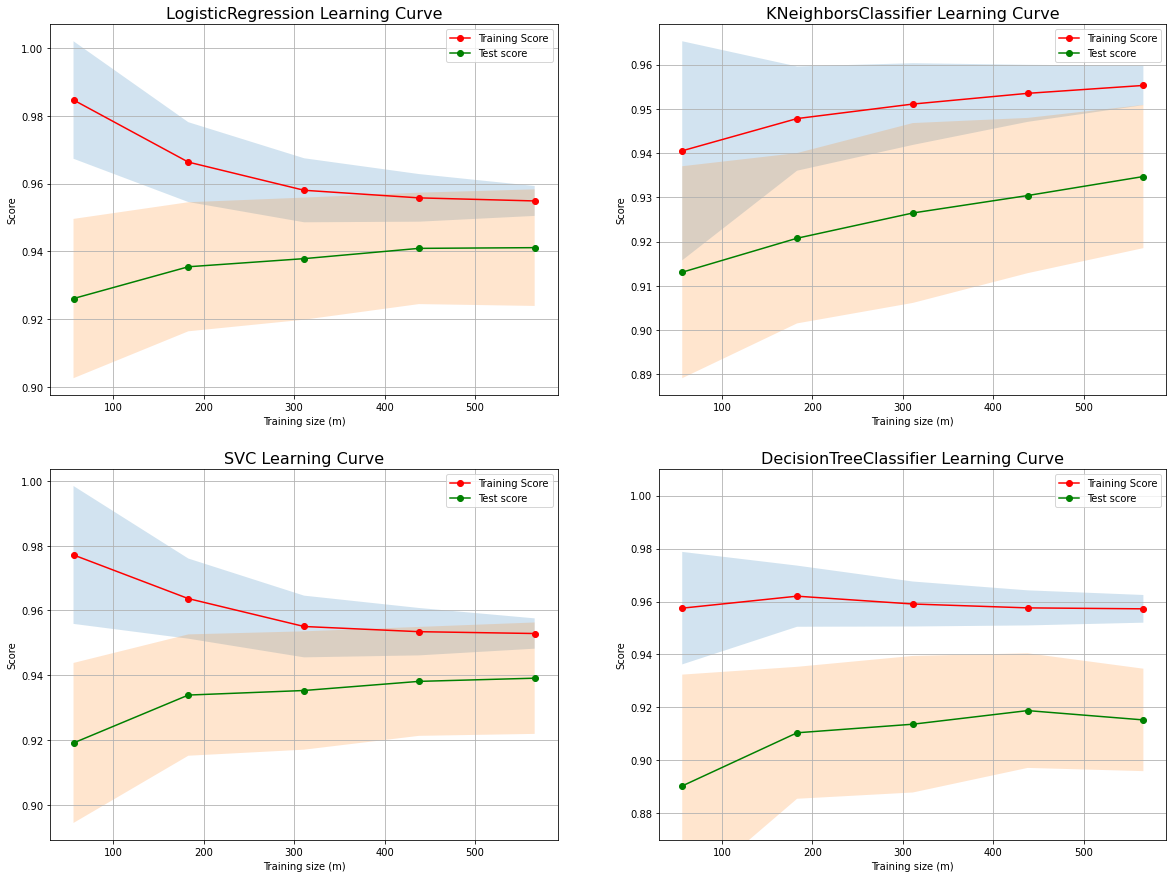

In [29]:
def plot_learning_curve(estimators, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1., 5)):
    _, axes = plt.subplots(len(estimators) // 2, len(estimators) // 2, figsize=(20, 15))
    axes = axes.flatten()
    if ylim is not None:
        plt.ylim(*ylim)
    
    for idx, estimator in enumerate(estimators):
        train_size, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_score_mean = np.mean(train_scores, axis=1)
        train_score_std = np.std(train_scores, axis=1)
        test_score_mean = np.mean(test_scores, axis=1)
        test_score_std = np.std(test_scores, axis=1)

        axes[idx].fill_between(train_size, train_score_mean - train_score_std, train_score_mean + train_score_std, alpha=0.2)
        axes[idx].fill_between(train_size, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha=0.2)
        axes[idx].plot(train_size, train_score_mean, 'o-', color='r', label='Training Score')
        axes[idx].plot(train_size, test_score_mean, 'o-', color='g', label='Test score')
        axes[idx].set_xlabel("Training size (m)")
        axes[idx].set_ylabel("Score")
        axes[idx].legend()
        axes[idx].grid()
        axes[idx].set_title("{} Learning Curve".format(estimator.__class__.__name__), fontsize=16)
    

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve([best_log_reg, best_knn, best_svc, best_tree_clf], X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [30]:
estimators = [best_log_reg, best_knn, best_svc, best_tree_clf]

estimator_predictions = []
estimator_predictions.append(cross_val_predict(best_log_reg, X_train, y_train, cv=8, method='decision_function'))
estimator_predictions.append(cross_val_predict(best_knn, X_train, y_train, cv=8))
estimator_predictions.append(cross_val_predict(best_svc, X_train, y_train, cv=8, method='decision_function'))
estimator_predictions.append(cross_val_predict(best_tree_clf, X_train, y_train, cv=8))



print("Logistic Regression: {:.2f}".format(roc_auc_score(y_train, estimator_predictions[0])))
print("KNN: {:.2f}".format(roc_auc_score(y_train, estimator_predictions[1])))
print("SVC: {:.2f}".format(roc_auc_score(y_train, estimator_predictions[2])))
print("Decision Tree Classifier: {:.2f}".format(roc_auc_score(y_train, estimator_predictions[3])))

Logistic Regression: 0.98
KNN: 0.93
SVC: 0.98
Decision Tree Classifier: 0.92


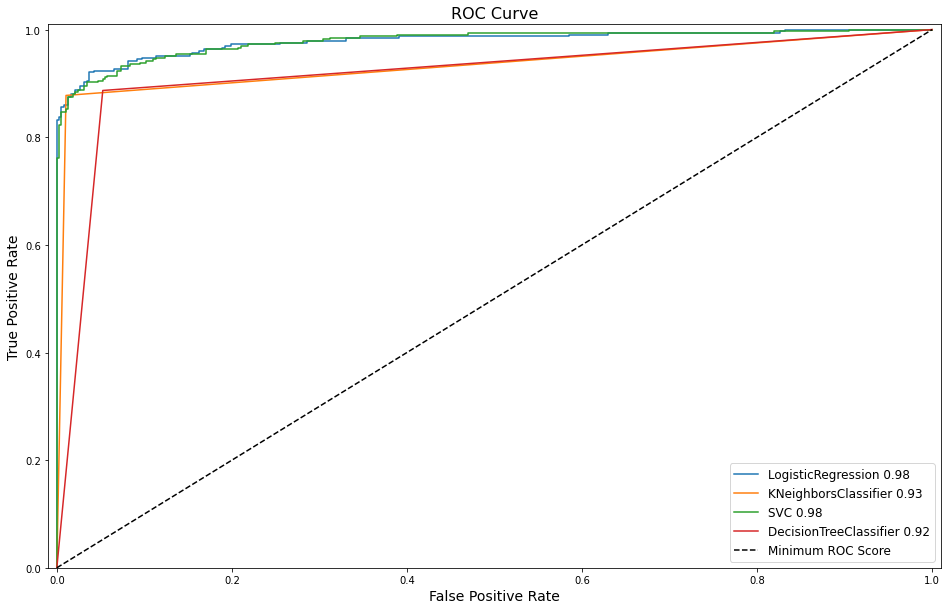

In [31]:
log_fpr, log_tpr, log_thresh = roc_curve(y_train, estimator_predictions[0])
knn_fpr, knn_tpr, knn_thresh = roc_curve(y_train, estimator_predictions[1])
svc_fpr, svc_tpr, svc_thresh = roc_curve(y_train, estimator_predictions[2])
tree_fpr, tree_tpr, tree_thresh = roc_curve(y_train, estimator_predictions[3])

fprs_tprs = [[log_fpr, log_tpr, best_log_reg], [knn_fpr, knn_tpr, best_knn], [svc_fpr, svc_tpr, best_svc], [tree_fpr, tree_tpr, best_tree_clf]]
def plot_roc_curves(fprs_tprs):
    plt.figure(figsize=(16, 10))
    i = 0
    for fpr, tpr, estimator in fprs_tprs:
        plt.plot(fpr, tpr, label="{} {:.2f}".format(estimator.__class__.__name__, roc_auc_score(y_train, estimator_predictions[i])))
        i += 1
    plt.plot([0, 1], [0, 1], 'k--', label='Minimum ROC Score')
    plt.axis([-0.01, 1.01, 0, 1.01])
    plt.title("ROC Curve", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.legend(fontsize=12)

plot_roc_curves(fprs_tprs=fprs_tprs)

In [32]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred = best_log_reg.predict(X_train)

print("Recall score: {:.2f}".format(recall_score(y_train, y_pred)))
print("Precision score: {:.2f}".format(precision_score(y_train, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_train, y_pred)))
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, y_pred)))
print("\n")

y_pred_test = best_log_reg.predict(X_test)
print("Recall score (test set): {:.2f}".format(recall_score(y_test, y_pred_test)))
print("Precision score (test set): {:.2f}".format(precision_score(y_test, y_pred_test)))
print("F1 score (test set): {:.2f}".format(f1_score(y_test, y_pred_test)))
print("Accuracy score (test set): {:.2f}".format(accuracy_score(y_test, y_pred_test)))

Recall score: 0.93
Precision score: 0.68
F1 score: 0.79
Accuracy score: 0.76


Recall score (test set): 0.96
Precision score (test set): 0.72
F1 score (test set): 0.83
Accuracy score (test set): 0.78


In [33]:
print("Accuracy score: {:.2f}".format(np.mean(accuracy)))
print("Precision score: {:.2f}".format(np.mean(precision)))
print("Recall score: {:.2f}".format(np.mean(recall)))
print("F1 score: {:.2f}".format(np.mean(f1)))

Accuracy score: 0.61
Precision score: 0.00
Recall score: 0.36
F1 score: 0.00


In [34]:
from sklearn.metrics import average_precision_score

undersampled_y_score = best_log_reg.decision_function(original_X_test)
undersampled_avg_precision = average_precision_score(original_y_test, undersampled_y_score)

print("Average precision-recall score: {:.2f}".format(undersampled_avg_precision))

Average precision-recall score: 0.04


Text(0.5, 1.0, 'UnderSampled Precision-Recall curve')

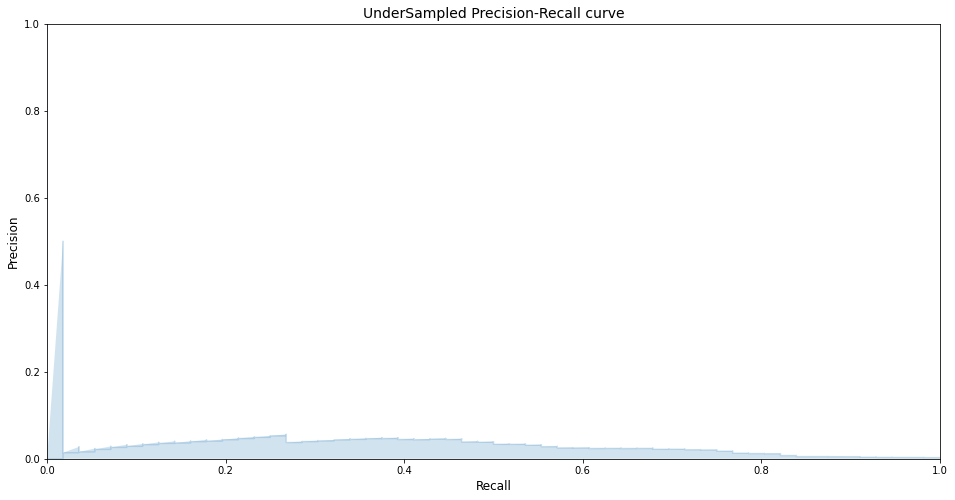

In [35]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(original_y_test, undersampled_y_score)

plt.figure(figsize=(16, 8))
plt.step(recall, precision, alpha=0.2)
plt.fill_between(recall, precision, alpha=0.2)
plt.axis([0, 1, 0, 1])
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("UnderSampled Precision-Recall curve", fontsize=14)

#### SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_rscv = RandomizedSearchCV(LogisticRegression(), log_reg_param_grid, n_iter=8)

for train, test in strat_shuffle_split.split(original_X_train, original_y_train):
    pipeline = imb_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg_rscv)
    estimator = pipeline.fit(original_X_train[train], original_y_train[train])
    best_estimator = log_reg_rscv.best_estimator_
    y_pred = best_estimator.predict(original_X_train[test])

    accuracy_lst.append(pipeline.score(original_X_train[test], original_y_train[test]))
    precision_lst.append(precision_score(original_y_train[test], y_pred))
    recall_lst.append(recall_score(original_y_train[test], y_pred))
    f1_lst.append(f1_score(original_y_train[test], y_pred))
    auc_lst.append(roc_auc_score(original_y_train[test], y_pred))

print("Accuracy: {:.2f}".format(np.mean(accuracy_lst)))
print("Precision: {:.2f}".format(np.mean(precision_lst)))
print("Recall: {:.2f}".format(np.mean(recall_lst)))
print("F1: {:.2f}".format(np.mean(f1_lst)))

Accuracy: 0.98
Precision: 0.06
Recall: 0.93
F1: 0.12


In [37]:
labels = ['No fraud', 'Fraud']
y_pred_smote = best_estimator.predict(original_X_test)
print(classification_report(original_y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28425
           1       0.06      0.84      0.11        56

    accuracy                           0.97     28481
   macro avg       0.53      0.91      0.55     28481
weighted avg       1.00      0.97      0.99     28481



In [38]:
y_score = best_estimator.decision_function(original_X_test)

avg_precision = average_precision_score(original_y_test, y_score)
print("Average precision score: {}".format(avg_precision))

Average precision score: 0.62719254286914


Text(0.5, 1.0, 'Oversampled Precision-Recall Curve')

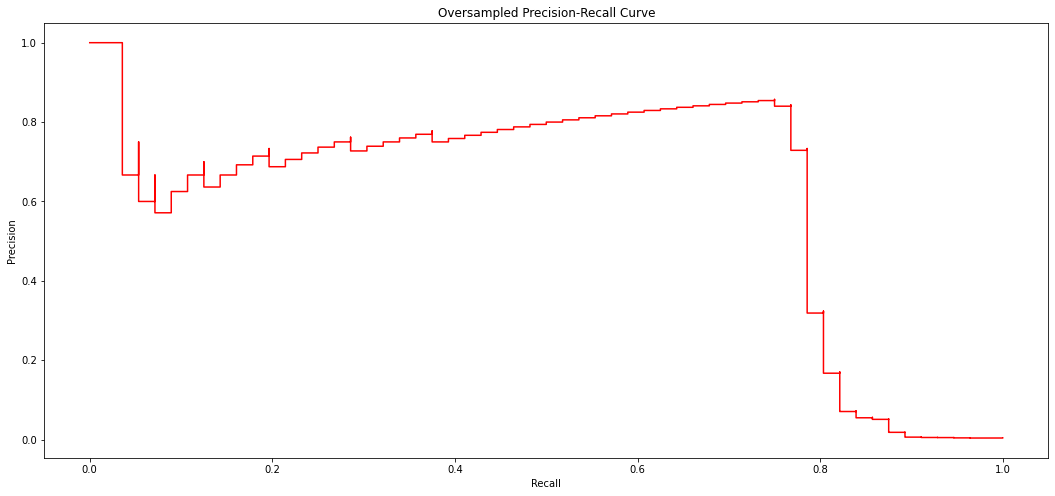

In [39]:
precision, recall, _ = precision_recall_curve(original_y_test, y_score)

plt.figure(figsize=(18, 8))
plt.step(recall, precision, color='r')
plt.xlabel("Recall")
plt.ylabel("Precision")
# plt.axis([0, 1, 0, 1])
plt.title("Oversampled Precision-Recall Curve")

In [40]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(original_X_train, original_y_train)

log_reg_smote = grid_log_reg.best_estimator_
log_reg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.5)

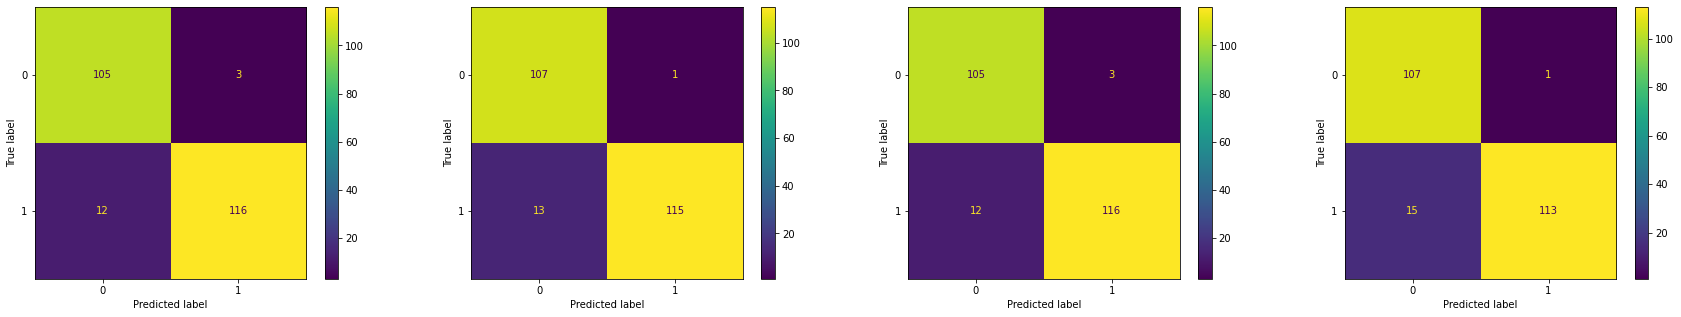

In [41]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 4, figsize=(30, 5))
plot_confusion_matrix(log_reg_smote, X_test, y_test, ax=ax[0])
plot_confusion_matrix(best_knn, X_test, y_test, ax=ax[1])
plot_confusion_matrix(best_svc, X_test, y_test, ax=ax[2])
plot_confusion_matrix(best_tree_clf, X_test, y_test, ax=ax[3])


In [42]:
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_knn = best_knn.predict(X_test)
y_pred_svc = best_svc.predict(X_test)
y_pred_tree = best_tree_clf.predict(X_test)

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knn))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       108
           1       0.97      0.91      0.94       128

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted avg       0.94      0.94      0.94       236

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       108
           1       0.99      0.90      0.94       128

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted avg       0.95      0.94      0.94       236

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       108
           1       0.97      0.91      0.94       128

    accuracy                           0.94       236
   macro avg       0.94      0.94      0.94       236
weighted

In [43]:
y_pred_und_samp = best_log_reg.predict(X_test)
undersampled_score = accuracy_score(y_test, y_pred_und_samp)

y_pred_smote = best_estimator.predict(X_test)
oversampled_score = accuracy_score(y_test, y_pred_smote)

print("Random UnderSampling: {:.2f}".format(undersampled_score))
print("OverSampling with SMOTE: {:.2f}".format(oversampled_score))

Random UnderSampling: 0.94
OverSampling with SMOTE: 0.94


#### Using Neural Network

In [175]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()

undersampledNN_model = keras.models.Sequential([
    keras.layers.Dense(X_train.shape[1], input_shape=(X_train.shape[1], ), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


undersampledNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 16)                496       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,460
Trainable params: 1,460
Non-trainable params: 0
_________________________________________________________________


In [176]:
undersampledNN_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15)
learning_rate_reduction_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose=1, factor=0.7, min_lr=0.00001)

undersampledNN_model.fit(X_train, y_train, validation_split=0.02, batch_size=16, epochs=100, shuffle=True, verbose=2, callbacks=[early_stopping_cb, learning_rate_reduction_cb])

Epoch 1/100
44/44 - 0s - loss: 0.7985 - accuracy: 0.7302 - val_loss: 0.3562 - val_accuracy: 0.8667 - lr: 0.0010 - 493ms/epoch - 11ms/step
Epoch 2/100
44/44 - 0s - loss: 0.2712 - accuracy: 0.9221 - val_loss: 0.2543 - val_accuracy: 0.8667 - lr: 0.0010 - 64ms/epoch - 1ms/step
Epoch 3/100
44/44 - 0s - loss: 0.2131 - accuracy: 0.9380 - val_loss: 0.2191 - val_accuracy: 0.8667 - lr: 0.0010 - 63ms/epoch - 1ms/step
Epoch 4/100
44/44 - 0s - loss: 0.1796 - accuracy: 0.9408 - val_loss: 0.1994 - val_accuracy: 0.8667 - lr: 0.0010 - 62ms/epoch - 1ms/step
Epoch 5/100
44/44 - 0s - loss: 0.1590 - accuracy: 0.9452 - val_loss: 0.1826 - val_accuracy: 0.8667 - lr: 0.0010 - 59ms/epoch - 1ms/step
Epoch 6/100
44/44 - 0s - loss: 0.1453 - accuracy: 0.9495 - val_loss: 0.1691 - val_accuracy: 0.8667 - lr: 0.0010 - 59ms/epoch - 1ms/step
Epoch 7/100
44/44 - 0s - loss: 0.1345 - accuracy: 0.9538 - val_loss: 0.1581 - val_accuracy: 0.8667 - lr: 0.0010 - 65ms/epoch - 1ms/step
Epoch 8/100
44/44 - 0s - loss: 0.1279 - accura

In [177]:
undersampled_predictions = undersampledNN_model.predict(original_X_test, batch_size=200, verbose=0)
undersampled_class_predictions = np.argmax(undersampled_predictions, axis=1)

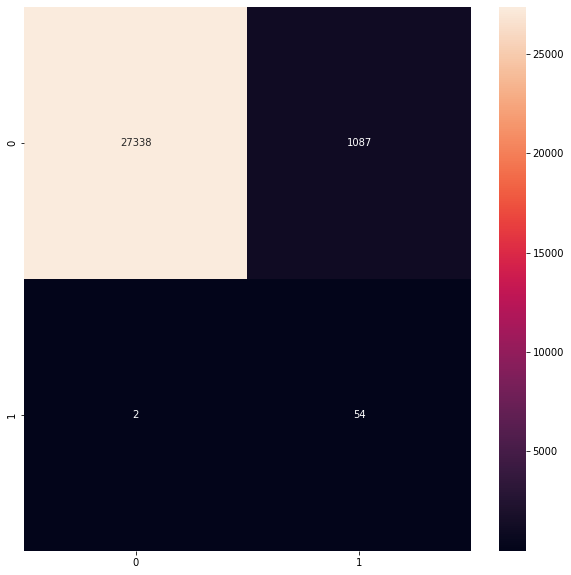

In [178]:
conf = confusion_matrix(original_y_test, undersampled_class_predictions)

fig, ax = plt.subplots(figsize=(10, 10))
conf_mtr = sns.heatmap(conf, annot=True, fmt='g')
# fig.colorbar(conf_mtr)
plt.show()

In [207]:
keras.backend.clear_session()

oversampledNN_model = keras.models.Sequential([
    keras.layers.Dense(X_train_smote.shape[1], input_shape=(X_train_smote.shape[1],), activation='relu'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(2, activation='softmax')
])

In [220]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
    
oversampledNN_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
learning_rate_reduction_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose=1, factor=0.1, min_lr=0.00001)
oversampledNN_model.fit(X_train_smote, y_train_smote, validation_split=0.05, batch_size=1000, epochs=100, shuffle=True, verbose=2, callbacks=[early_stopping_cb, learning_rate_reduction_cb])

Epoch 1/100
487/487 - 2s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 0.9997 - lr: 0.0100 - 2s/epoch - 4ms/step
Epoch 2/100
487/487 - 1s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 9.2024e-04 - val_accuracy: 0.9998 - lr: 0.0100 - 1s/epoch - 2ms/step
Epoch 3/100
487/487 - 1s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 8.5693e-04 - val_accuracy: 0.9998 - lr: 0.0100 - 1s/epoch - 2ms/step
Epoch 4/100
487/487 - 1s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 8.1546e-04 - val_accuracy: 0.9999 - lr: 0.0100 - 1s/epoch - 2ms/step
Epoch 5/100
487/487 - 1s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 7.8740e-04 - val_accuracy: 0.9999 - lr: 0.0100 - 1s/epoch - 2ms/step
Epoch 6/100
487/487 - 1s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 7.6770e-04 - val_accuracy: 0.9999 - lr: 0.0100 - 938ms/epoch - 2ms/step
Epoch 7/100
487/487 - 1s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 7.5307e-04 - val_accuracy: 0.9999 - lr: 0.0100 - 1s/epoch - 2ms/step
Epoch 8/100
487/487 -

In [221]:
oversampled_predictions = oversampledNN_model.predict(original_X_test, batch_size=200, verbose=0)
oversampled_class_predictions = np.argmax(oversampled_predictions, axis=1)

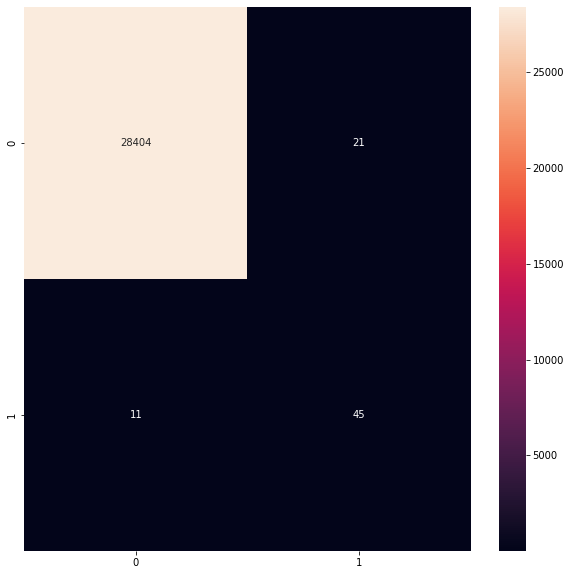

In [222]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(original_y_test, oversampled_class_predictions)

fig, ax = plt.subplots(figsize=(10, 10))
conf_mtr = sns.heatmap(conf, annot=True, fmt='g')
# fig.colorbar(conf_mtr)
plt.show()